In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#get the data from
!wget https://www.dropbox.com/s/lwvhkaaawhk626d/Dataset.zip?dl=0

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
#unzip the Dataset
!unzip /content/Dataset.zip?dl=0

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
import Augmentor
p = Augmentor.Pipeline("/content/Dataset/Abnormal WCE Images",output_directory="/content/Dataset-Augmented/Abnormal WCE Images")
#Step 3 Define the Operations
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(5000)

OSError: The source directory you specified does not exist.

In [ ]:

import Augmentor
p = Augmentor.Pipeline("/content/Dataset/Normal WCE Images",output_directory="/content/Dataset-Augmented/Normal WCE Images")
#Step 3 Define the Operations
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(5000)

Initialised with 2000 image(s) found.
Output directory set to /content/Dataset-Augmented/Normal WCE Images.

Processing <PIL.Image.Image image mode=RGB size=400x300 at 0x7CC2E834F730>: 100%|██████████| 5000/5000 [09:30<00:00,  8.77 Samples/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
#count the number of images in the respective classes
ROOT_DIR = "/content/Dataset-Augmented"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))


In [ ]:
number_of_images.items()

dict_items([('Normal WCE Images', 5000), ('Abnormal WCE Images', 5000)])

In [ ]:
def dataFolder(p,split):
  #creating folders for test,validation and training data
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)
    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),size = (math.floor(split*number_of_images[dir]-5)),replace = False):
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join("./"+p,dir)
        shutil.copy(O,D)
        os.remove(O)
    else:
          print(f"{p} Folder exists")

In [ ]:
dataFolder("train",0.8)

train Folder exists


In [ ]:
dataFolder("validation",0.10)

validation Folder exists


In [ ]:
dataFolder("test",0.10)

test Folder exists


In [ ]:
#MODEL BUILD
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
#CNN Model
model = Sequential()

model.add(Conv2D(filters = 16,kernel_size = (3,3),activation = 'relu', input_shape = (224,224,3)))

model.add(Conv2D(filters = 36,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters = 256,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))
#

# model.add(Conv2D(filters = 512,kernel_size = (3,3),activation = 'relu'))
# model.add(MaxPool2D(pool_size= (2,2)))

#model.add(Conv2D(filters = 1024,kernel_size = (3,3),activation = 'relu'))
#model.add(MaxPool2D(pool_size= (2,2)))

#

model.add(Dropout(rate = 0.4))

model.add(Flatten())
model.add(Dense(units = 64,activation = 'relu'))
#model.add(Dropout(rate = 0.4))
model.add(Dense(units = 1,activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

## ***model-2***

In [ ]:
import tensorflow as tf

cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=256, padding='same', strides=(2,2), kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

cnn.add(tf.keras.layers.Conv2D(filters=128, padding='same', strides=(2,2), kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

cnn.add(tf.keras.layers.Conv2D(filters=64, padding='same', strides=(2,2), kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same', strides=(2,2), kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

cnn.add(tf.keras.layers.Conv2D(filters=16, padding='same', strides=(2,2), kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Change the number of neurons and activation function

# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.compile(optimizer = 'adam',loss = keras.losses.binary_crossentropy,metrics = ['accuracy'])

In [ ]:

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
def preprocessingImages(path):

  #input is path
  #output is the preprocessed images

  image_data = ImageDataGenerator(zoom_range = 0.2,shear_range = 0.2,rescale = 1/255,horizontal_flip = True)
  image = image_data.flow_from_directory(directory = path,target_size = (224,224),batch_size = 16,class_mode = 'binary')
  return image

In [ ]:
path = "/content/train"
train_data = preprocessingImages(path)

Found 7990 images belonging to 2 classes.


In [ ]:
# Accessing batches of images and labels
X_train, Y_train = next(train_data)


In [ ]:
def preprocessingImages1(path):

  #input is path
  #output is the preprocessed images

  image_data = ImageDataGenerator(rescale = 1/255)
  image = image_data.flow_from_directory(directory = path,target_size = (224,224),batch_size = 32,class_mode = 'binary')
  return image

In [ ]:
path = "/content/test"
test_data = preprocessingImages1(path)

Found 990 images belonging to 2 classes.


In [ ]:
path = "/content/validation"
val_data = preprocessingImages1(path)

Found 990 images belonging to 2 classes.


In [ ]:
X_val, Y_val = next(val_data)

# Early stop=Model-1

In [ ]:
#EARLY STOPPING & MODEL CHECKPOINTS
from keras.callbacks import ModelCheckpoint,EarlyStopping

#EARLY STOPPING
es = EarlyStopping(monitor = "val_accuracy",min_delta = 0.01,patience = 10,verbose = 1,mode = 'auto')

#MODEL CHECKPOINTS
mc = ModelCheckpoint(monitor = "val_accuracy",filepath = "./bestmodel.h5",verbose = 1,save_best_only = True,mode = 'auto')

cd = [es,mc]


# Early Stop Model-2

In [ ]:
#EARLY STOPPING & MODEL CHECKPOINTS
from keras.callbacks import ModelCheckpoint,EarlyStopping

#EARLY STOPPING
es = EarlyStopping(monitor = "val_accuracy",min_delta = 0.01,patience = 10,verbose = 1,mode = 'auto')

#MODEL CHECKPOINTS
mc = ModelCheckpoint(monitor = "val_accuracy",filepath = "./bestmodel_2.h5",verbose = 1,save_best_only = True,mode = 'auto')

cd = [es,mc]

In [ ]:
#Model Training
#hs = model.fit_generator(generator = train_data,steps_per_epoch = 8,epochs = 50,verbose = 1,validation_data = val_data,validation_steps = 16,callbacks = cd)

In [ ]:
hs = model.fit_generator(generator=train_data,
                         steps_per_epoch=len(train_data),
                         epochs=50,
                         verbose=1,
                         validation_data=val_data,
                         validation_steps=len(val_data),
                         callbacks=cd)


Epoch 1/50
500/500 [==============================] - ETA: 0s - loss: 0.5961 - accuracy: 0.6735
Epoch 1: val_accuracy improved from -inf to 0.75253, saving model to ./bestmodel.h5
500/500 [==============================] - 167s 304ms/step - loss: 0.5961 - accuracy: 0.6735 - val_loss: 0.5101 - val_accuracy: 0.7525
Epoch 2/50
500/500 [==============================] - ETA: 0s - loss: 0.4991 - accuracy: 0.7613
Epoch 2: val_accuracy improved from 0.75253 to 0.79697, saving model to ./bestmodel.h5
500/500 [==============================] - 147s 294ms/step - loss: 0.4991 - accuracy: 0.7613 - val_loss: 0.4610 - val_accuracy: 0.7970
Epoch 3/50
500/500 [==============================] - ETA: 0s - loss: 0.4562 - accuracy: 0.7886
Epoch 3: val_accuracy improved from 0.79697 to 0.79899, saving model to ./bestmodel.h5
500/500 [==============================] - 152s 304ms/step - loss: 0.4562 - accuracy: 0.7886 - val_loss: 0.4429 - val_accuracy: 0.7990
Epoch 4/50
500/500 [=============================

# **My-Model**

In [ ]:
hs2 = cnn.fit_generator(generator=train_data,
                         steps_per_epoch=len(train_data),
                         epochs=50,
                         verbose=1,
                         validation_data=val_data,
                         validation_steps=len(val_data),
                         callbacks=cd)


Epoch 1/50
500/500 [==============================] - ETA: 0s - loss: 0.6014 - accuracy: 0.6656
Epoch 1: val_accuracy improved from -inf to 0.79192, saving model to ./bestmodel_2.h5
500/500 [==============================] - 150s 274ms/step - loss: 0.6014 - accuracy: 0.6656 - val_loss: 0.4653 - val_accuracy: 0.7919
Epoch 2/50
500/500 [==============================] - ETA: 0s - loss: 0.4802 - accuracy: 0.7741
Epoch 2: val_accuracy improved from 0.79192 to 0.81111, saving model to ./bestmodel_2.h5
500/500 [==============================] - 131s 262ms/step - loss: 0.4802 - accuracy: 0.7741 - val_loss: 0.4435 - val_accuracy: 0.8111
Epoch 3/50
500/500 [==============================] - ETA: 0s - loss: 0.4389 - accuracy: 0.7990
Epoch 3: val_accuracy improved from 0.81111 to 0.84040, saving model to ./bestmodel_2.h5
500/500 [==============================] - 132s 263ms/step - loss: 0.4389 - accuracy: 0.7990 - val_loss: 0.3914 - val_accuracy: 0.8404
Epoch 4/50
500/500 [=======================

In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# Function to build the base CNN model
def build_cnn(hp):
    cnn = tf.keras.Sequential()

    cnn.add(tf.keras.layers.Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=256, step=32),
        padding='same',
        strides=(2, 2),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(224, 224, 3)
    ))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    for i in range(hp.Int('num_conv_layers', min_value=1, max_value=4)):
        cnn.add(tf.keras.layers.Conv2D(
            filters=hp.Int(f'conv{i+2}_filters', min_value=32, max_value=256, step=32),
            padding='same',
            strides=(2, 2),
            kernel_size=(3, 3),
            activation='relu'
        ))
        cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    cnn.add(tf.keras.layers.Flatten())
    cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    cnn.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return cnn

# Instantiate the tuner
tuner = RandomSearch(
    build_cnn,
    objective='val_accuracy',
    max_trials=5,  # Adjust the number of trials as needed
    directory='keras_tuner_logs',  # Specify a directory to store logs and checkpoints
    project_name='image_classification_tuning'
)

# Search for the best hyperparameters
tuner.search(train_data, epochs=50, validation_data=val_data)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters
best_model.fit(train_data, epochs=10, validation_data=val_data)


Trial 1 Complete [01h 56m 12s]
val_accuracy: 0.8868687152862549

Best val_accuracy So Far: 0.8868687152862549
Total elapsed time: 01h 56m 12s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
256               |160               |conv1_filters
3                 |1                 |num_conv_layers
96                |64                |conv2_filters

Epoch 1/50
500/500 [==============================] - 153s 302ms/step - loss: 0.6084 - accuracy: 0.6633 - val_loss: 0.4978 - val_accuracy: 0.7717
Epoch 2/50
500/500 [==============================] - 155s 309ms/step - loss: 0.4800 - accuracy: 0.7746 - val_loss: 0.4238 - val_accuracy: 0.8212
Epoch 3/50
500/500 [==============================] - 151s 303ms/step - loss: 0.4535 - accuracy: 0.7951 - val_loss: 0.4120 - val_accuracy: 0.8242
Epoch 4/50
500/500 [==============================] - 151s 301ms/step - loss: 0.4293 - accuracy: 0.8088 - val_loss: 0.3836 - val_accuracy: 0.8313
Epoch 5/50
500/500 [===============

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Source and destination paths
source_path = "/content/bestmodel.h5"  # Replace with the actual path to your file
destination_path = "/content/drive/MyDrive/"  # Replace with the desired destination folder in your Google Drive

# Copy the file
shutil.copy(source_path, destination_path)


'/content/drive/MyDrive/bestmodel.h5'

In [ ]:
import shutil

# Source and destination paths
source_path = "/content/bestmodel_2.h5"  # Replace with the actual path to your file
destination_path = "/content/drive/MyDrive/"  # Replace with the desired destination folder in your Google Drive

# Copy the file
shutil.copy(source_path, destination_path)

'/content/drive/MyDrive/bestmodel_2.h5'

In [ ]:
import shutil
import os

# Source and destination paths
source_folder = "/content/Dataset-Augmented"  # Replace with the actual path to your folder
destination_folder = "/content/drive/MyDrive/Dataset-Augmented_New"  # Replace with the desired destination folder in your Google Drive

# Remove the existing destination folder if it exists
if os.path.exists(destination_folder):
    shutil.rmtree(destination_folder)

# Copy the folder
shutil.copytree(source_folder, destination_folder)


'/content/drive/MyDrive/Dataset-Augmented_New'

# **Model-1**

In [ ]:
#GRAPHICAL INTERPRETATION
h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

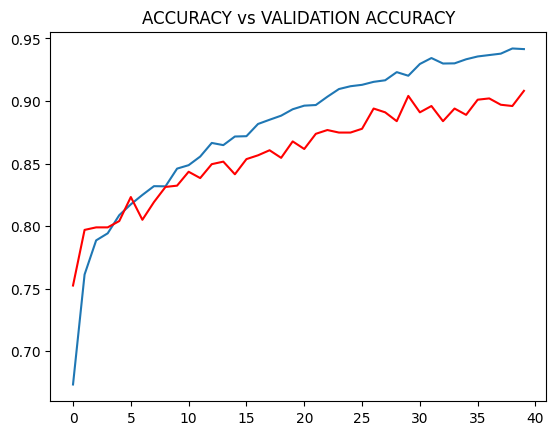

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title("ACCURACY vs VALIDATION ACCURACY")
plt.show()

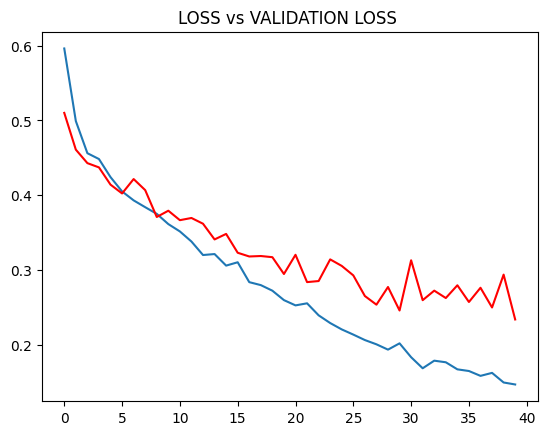

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title("LOSS vs VALIDATION LOSS ")
plt.show()

In [ ]:
#Calculating Model Accuracy

from keras.models import load_model
model = load_model("/content/bestmodel.h5")

In [ ]:
acc = model.evaluate_generator(test_data)[1]
print(f"Accuracy is {acc*100}%.")

Accuracy is 89.69696760177612%.


## ***Model-2***

In [ ]:
#GRAPHICAL INTERPRETATION
h_2 = hs2.history
h_2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

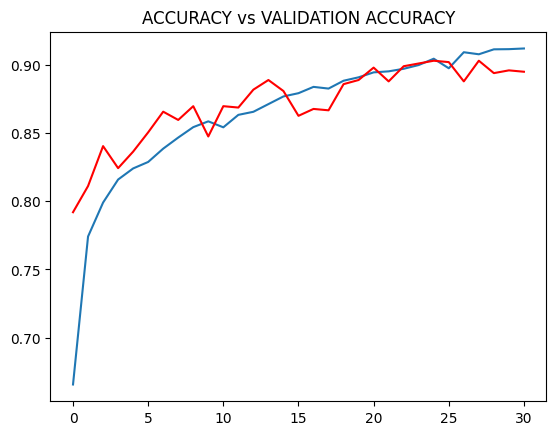

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h_2['accuracy'])
plt.plot(h_2['val_accuracy'],c='red')
plt.title("ACCURACY vs VALIDATION ACCURACY")
plt.show()

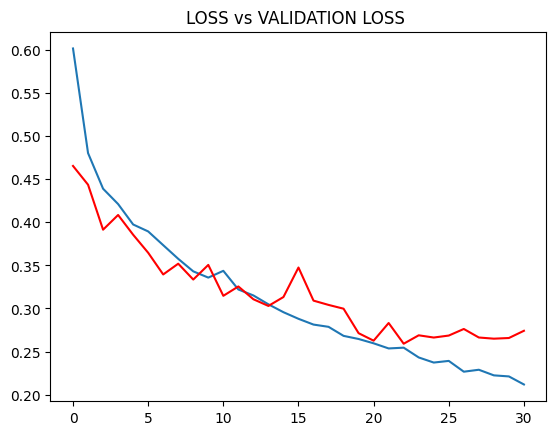

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h_2['loss'])
plt.plot(h_2['val_loss'],c='red')
plt.title("LOSS vs VALIDATION LOSS ")
plt.show()

In [ ]:
acc2 = cnn.evaluate_generator(test_data)[1]
print(f"Accuracy is {acc2*100}%.")

Accuracy is 89.49494957923889%.


In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

# Load models
model_1 = load_model('/content/drive/MyDrive/bestmodel.h5')
model_1 = Model(inputs=model_1.inputs, outputs=model_1.outputs, name='name_of_model_1')

model_2 = load_model('/content/drive/MyDrive/bestmodel_2.h5')
model_2 = Model(inputs=model_2.inputs, outputs=model_2.outputs, name='name_of_model_2')

# Create a list of models and weights
models = [model_1, model_2]
weights = [0.8, 0.2]

# Create an input layer for the ensemble model
model_input = Input(shape=(224, 224, 3))

# Get the outputs of each model
model_outputs = [model(model_input) for model in models]

# Use the Average layer to compute the average predictions
ensemble_output = Average()(model_outputs)

# Create the ensemble model
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

# Compile the ensemble model
ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the summary of the ensemble model
ensemble_model.summary()


Model: "ensemble"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 name_of_model_1 (Functiona  (None, 1)                    2754917   ['input_6[0][0]']             
 l)                                                                                               
                                                                                                  
 name_of_model_2 (Functiona  (None, 1)                    399105    ['input_6[0][0]']             
 l)                                                                                               
                                                                                           

In [ ]:
# EARLY STOPPING & MODEL CHECKPOINTS
from keras.callbacks import ModelCheckpoint, EarlyStopping

# EARLY STOPPING
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=10, verbose=1, mode='auto')

# MODEL CHECKPOINTS
mc = ModelCheckpoint(
    monitor="val_accuracy",
    filepath="/content/drive/MyDrive/bestmodel_ensemble.h5",  # Specify your desired path in Google Drive
    verbose=1,
    save_best_only=True,
    mode='auto'
)

cd = [es, mc]




In [ ]:
hs3 = ensemble_model.fit_generator(generator=train_data,
                         steps_per_epoch=len(train_data),
                         epochs=50,
                         verbose=1,
                         validation_data=val_data,
                         validation_steps=len(val_data),
                         callbacks=cd)

Epoch 1/50
500/500 [==============================] - ETA: 0s - loss: 0.2548 - accuracy: 0.8992
Epoch 1: val_accuracy improved from -inf to 0.92323, saving model to /content/drive/MyDrive/bestmodel_ensemble.h5
500/500 [==============================] - 160s 309ms/step - loss: 0.2548 - accuracy: 0.8992 - val_loss: 0.2174 - val_accuracy: 0.9232
Epoch 2/50
500/500 [==============================] - ETA: 0s - loss: 0.2478 - accuracy: 0.9010
Epoch 2: val_accuracy did not improve from 0.92323
500/500 [==============================] - 151s 302ms/step - loss: 0.2478 - accuracy: 0.9010 - val_loss: 0.2424 - val_accuracy: 0.9061
Epoch 3/50
500/500 [==============================] - ETA: 0s - loss: 0.2379 - accuracy: 0.9083
Epoch 3: val_accuracy did not improve from 0.92323
500/500 [==============================] - 150s 300ms/step - loss: 0.2379 - accuracy: 0.9083 - val_loss: 0.2153 - val_accuracy: 0.9232
Epoch 4/50
500/500 [==============================] - ETA: 0s - loss: 0.2209 - accuracy: 0.

In [ ]:
#GRAPHICAL INTERPRETATION
h_3 = hs3.history
h_3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

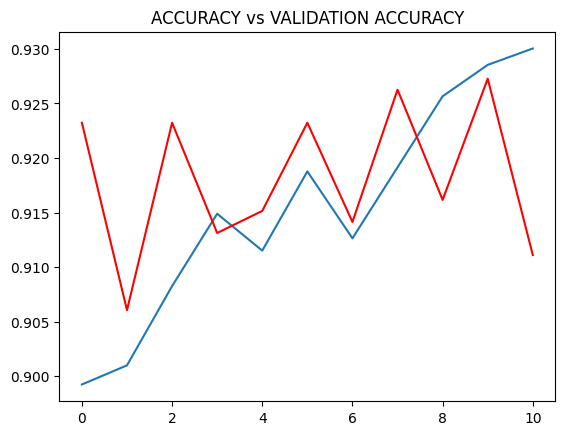

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h_3['accuracy'])
plt.plot(h_3['val_accuracy'],c='red')
plt.title("ACCURACY vs VALIDATION ACCURACY")
plt.show()

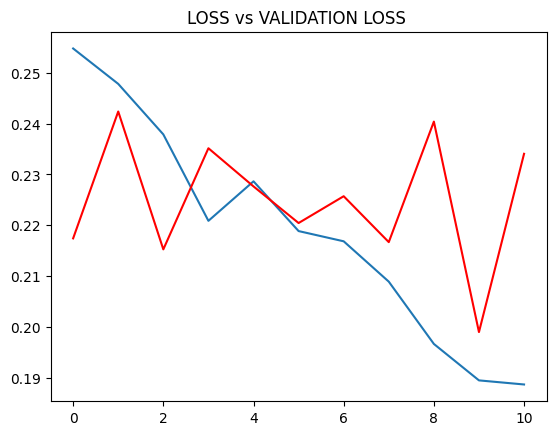

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h_3['loss'])
plt.plot(h_3['val_loss'],c='red')
plt.title("LOSS vs VALIDATION LOSS ")
plt.show()

In [ ]:
acc3 = ensemble_model.evaluate_generator(test_data)[1]
print(f"Accuracy is {acc3*100}%.")

Accuracy is 91.01009964942932%.


1/1 [==============================] - 0s 81ms/step
[[1]]
The image contains no abnormalities.


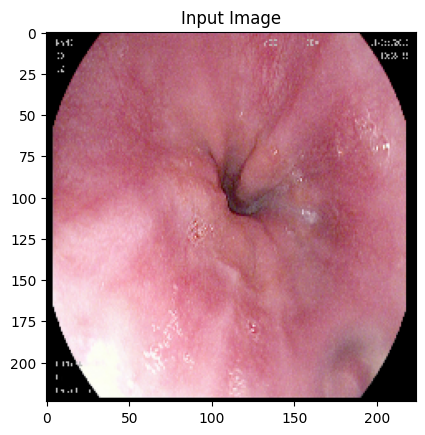

In [ ]:
from tensorflow.keras.utils import load_img,img_to_array

path = "/content/Dataset/Normal WCE Images/2fa3a452-1ad5-49cd-a5e9-0fdbf96e0b6e.jpg"
img = load_img(path,target_size = (224,224))
input_arr = img_to_array(img)/255

input_arr.shape
input_arr = np.expand_dims(input_arr,axis=0)
pred=(cnn.predict(input_arr) > 0.5).astype("int32")

print(pred)

if pred == 0:
  print("The image contains abnormalities.")

else:
  print("The image contains no abnormalities.")

#To Display the Image
plt.imshow(input_arr[0])
plt.title("Input Image")
plt.show()

1/1 [==============================] - 0s 19ms/step
[[0]]
The image contains abnormalities.


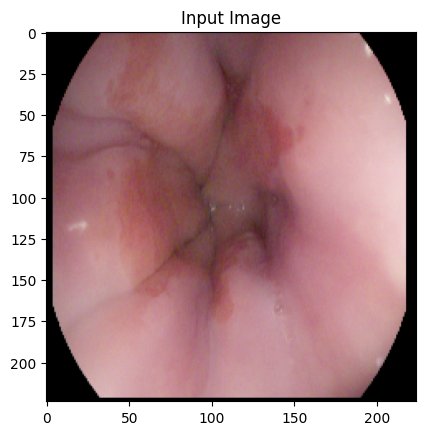

In [ ]:
from tensorflow.keras.utils import load_img,img_to_array

path = "/content/Dataset/Abnormal WCE Images/03ccdf30-eac8-4e3b-b8e5-54fbf64709dd.jpg"
img= load_img(path,target_size = (224,224))
input_arr = img_to_array(img)/255

input_arr.shape
input_arr = np.expand_dims(input_arr,axis=0)
pred=(cnn.predict(input_arr) > 0.5).astype("int32")

print(pred)

if pred == 0:
  print("The image contains abnormalities.")

else:
  print("The image contains no abnormalities.")

#To Display the Image
plt.imshow(input_arr[0])
plt.title("Input Image")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Average, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

# Define the function to create the model
def create_model(weight_1=0.5, weight_2=0.5):
    # Load models
    model_1 = load_model('/content/bestmodel.h5')
    model_1 = Model(inputs=model_1.inputs, outputs=model_1.outputs, name='name_of_model_1')

    model_2 = load_model('/content/bestmodel_2.h5')
    model_2 = Model(inputs=model_2.inputs, outputs=model_2.outputs, name='name_of_model_2')

    # Create a list of models and weights
    models = [model_1, model_2]
    weights = [weight_1, weight_2]

    # Create an input layer for the ensemble model
    model_input = Input(shape=(224, 224, 3))

    # Get the outputs of each model
    model_outputs = [model(model_input) for model in models]

    # Use the Average layer to compute the average predictions with tuned weights
    weighted_average_output = Average()([output * weight for output, weight in zip(model_outputs, weights)])

    # Add a Dense layer for binary classification
    ensemble_output = Dense(1, activation='sigmoid')(weighted_average_output)

    # Create the ensemble model
    ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

    # Compile the ensemble model
    ensemble_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return ensemble_model

# Create KerasClassifier for use with scikit-learn GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Define hyperparameter grid for grid search
param_grid = {
    'weight_1': [0.1, 0.5, 0.9],
    'weight_2': [0.1, 0.5, 0.9]
}

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_result = grid.fit(train_data, val_data)  # Replace X_train, y_train with your training data

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


ModuleNotFoundError: ignored

In [ ]:
!pip install --upgrade tensorflow keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfull

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

# Load models
model_1 = load_model('/content/drive/MyDrive/bestmodel.h5')
model_1 = Model(inputs=model_1.inputs, outputs=model_1.outputs, name='name_of_model_1')

model_2 = load_model('/content/drive/MyDrive/bestmodel_2.h5')
model_2 = Model(inputs=model_2.inputs, outputs=model_2.outputs, name='name_of_model_2')

# Create a list of models and weights
models = [model_1, model_2]

# Experiment with different weight combinations
for w1 in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    w2 = 1.0 - w1

    # Set the weights
    weights = [w1, w2]

    # Create an input layer for the ensemble model
    model_input = Input(shape=(224, 224, 3))

    # Get the outputs of each model
    model_outputs = [model(model_input) for model in models]

    # Use the Average layer to compute the average predictions
    ensemble_output = Average()(model_outputs)

    # Create the ensemble model
    ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

    # Compile the ensemble model
    ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




    # Evaluate the model on your validation set
    validation_accuracy = ensemble_model.evaluate(validation_data, validation_labels)[1]

    # Print the weights and validation accuracy
    print(f"Weights: {weights}, Validation Accuracy: {validation_accuracy}")
